# Final Project - Group 10

#### Blenda Hoang, Alexander Chin, Billy Marin, Sejoon Park

### Project Proposal: Millions of people get onto flights every day. But what factors most influence whether or not they are satisfied with their flight experience or loyal to the airline? Using a dataset of over 120,000 customer reviews on elements such as food & drink, inflight entertainment, and flight distance, we intend to answer these questions.

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import os
import numpy as np

In [4]:
data = pd.read_csv('airline.csv',index_col=0, parse_dates=True,header=0)

In [5]:
df = data.copy()

### Data Description

In [6]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure_Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

In [8]:
df.isna().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [11]:
df.shape

(129487, 24)

In [12]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

### Data Cleaning

In [13]:
df.drop(columns='id',inplace=True)

In [14]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [15]:
df.replace(to_replace='Male',value=1,inplace=True)
df.replace(to_replace='Female',value=0,inplace=True)

In [16]:
df.replace(to_replace='Loyal Customer',value=1,inplace=True)
df.replace(to_replace='disloyal Customer',value=0,inplace=True)

In [17]:
df.replace(to_replace='Business travel',value=1,inplace=True)
df.replace(to_replace='Personal Travel',value=0,inplace=True)

In [18]:
df.replace(to_replace='satisfied',value=1,inplace=True)
df.replace(to_replace='neutral or dissatisfied',value=0,inplace=True)

In [19]:
df.rename(columns=\
        {'Gender':'Male','Customer_Type':'Loyal_Customer','Type_of_Travel':'Business_travel','satisfaction':'Satisfied'},inplace=True)

In [20]:
df = pd.get_dummies(df, columns=['Class'], dummy_na=True)

In [21]:
df.head()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus,Class_nan
0,0,1,52,1,160,5,4,3,4,3,...,2,5,5,50,44.0,1,0,1,0,0
1,0,1,36,1,2863,1,1,3,1,5,...,3,4,5,0,0.0,1,1,0,0,0
2,1,0,20,1,192,2,0,2,4,2,...,2,2,2,0,0.0,0,0,1,0,0
3,1,1,44,1,3377,0,0,0,2,3,...,3,1,4,0,6.0,1,1,0,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,4,2,4,0,20.0,1,0,1,0,0


In [22]:
df.drop(columns='Class_nan',inplace=True)

In [23]:
df.head()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,52,1,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1,0,0
2,1,0,20,1,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0,1,0


### Exploratory Data Analysis

##### Feature Engineering

In [24]:
df2 = df.copy()

In [25]:
df2['discretized_age_EW']=pd.cut(df2.Age, 5)
df2['discretized_age_EF']=pd.qcut(df2.Age, 5)

In [26]:
df2['Departure_Delay_EW']=pd.cut(df2.Departure_Delay_in_Minutes, bins=[-1,30,60,90,120,1000])

In [27]:
df2['Arrival_Delay_EW']=pd.cut(df2.Arrival_Delay_in_Minutes, bins=[-1,30,60,90,120,1000])

In [28]:
conditions = [
    ((df2['Departure_Delay_in_Minutes'] > 0) & (df2['Arrival_Delay_in_Minutes'] > 0)),
    ((df2['Departure_Delay_in_Minutes'] != 0) & (df2['Arrival_Delay_in_Minutes'] == 0)),
    ((df2['Departure_Delay_in_Minutes'] == 0) & (df2['Arrival_Delay_in_Minutes'] != 0)),
    ((df2['Departure_Delay_in_Minutes'] == 0) & (df2['Arrival_Delay_in_Minutes'] == 0))]

values = [1,0.5,0.5,0]

In [29]:
df2['Travel_Delays'] = np.select(conditions, values)

##### Count of satisfied customers by flight class

<AxesSubplot:xlabel='Satisfied', ylabel='count'>

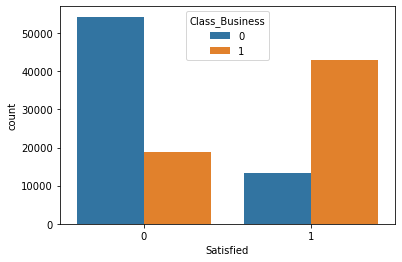

In [30]:
sns.countplot(x='Satisfied', hue="Class_Business", data=df)

The company has overall more unsatisfied customers but of those customers who are satisfied, there is a larger concentration in those flying business class.

#### Pie Chart of Satisfaction Category by Flight Class

<AxesSubplot:ylabel='Class'>

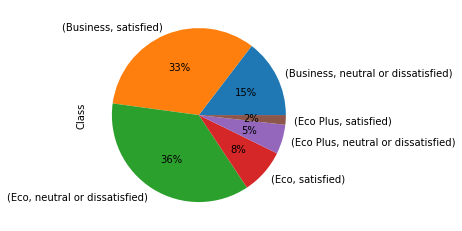

In [31]:
data.groupby(['Class','satisfaction'])['Class'].count().plot(kind='pie', autopct='%1.0f%%')

##### Count of Loyal or Disloyal Customers

<AxesSubplot:xlabel='Loyal_Customer', ylabel='count'>

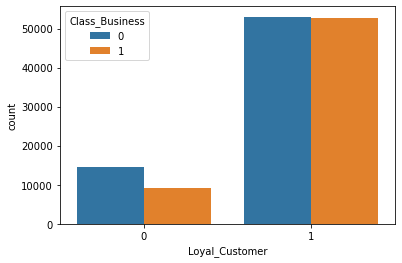

In [32]:
sns.countplot(x='Loyal_Customer',hue="Class_Business", data=df2)

#### Rating of Inflight Wifi Service by Satisfaction Category


<AxesSubplot:xlabel='Inflight_wifi_service', ylabel='count'>

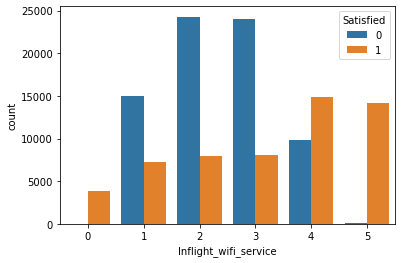

In [33]:
sns.countplot(x = 'Inflight_wifi_service', hue = 'Satisfied', data = df)

#### Rating of Ease of Online Booking by Satisfaction Category

<AxesSubplot:xlabel='Online_boarding', ylabel='count'>

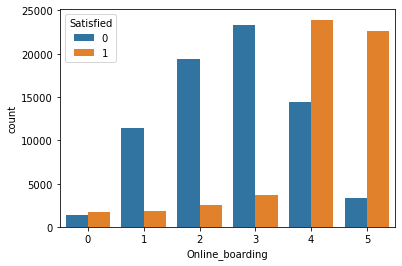

In [34]:
sns.countplot(x = 'Online_boarding', hue = 'Satisfied', data = df)

Despite having a greater proportion of unsatisfied customers, this airline has a greater proportion of loyal customers. Loyal customers also observe a higher proportion of business class fliers.

#### Departure & Arrival Delays

In [35]:
df2.groupby(['Arrival_Delay_EW','Travel_Delays','Satisfied']).agg({'Satisfied':'count'}).rename(columns=\
        {'Satisfied':'Count'})

Count
Arrival_Delay_EW Travel_Delays Satisfied       
(-1, 30]         0.0           0          31345
                               1          28006
                 0.5           0          14704
                               1          11892
                 1.0           0          15382
                               1           9783
(30, 60]         0.0           0              0
                               1              0
                 0.5           0            382
                               1            203
                 1.0           0           5557
                               1           3145
(60, 90]         0.0           0              0
                               1              0
                 0.5           0             40
                               1             19
                 1.0           0           2461
                               1           1342
(90, 120]        0.0           0              0
                               1              0
                 0.5           0             15
                               1              4
                 1.0           0           1299
                               1            716
(120, 1000]      0.0           0              0
                               1              0
                 0.5           0              1
                               1              0
                 1.0           0           2037
                               1           1150

In [36]:
Arrival_Satisfaction = df2.groupby(['Arrival_Delay_EW','Travel_Delays','Satisfied']).agg({'Satisfied':'count'}).rename(columns=\
        {'Satisfied':'Count'})

Arrival_Satisfaction_Perc = Arrival_Satisfaction.groupby(['Arrival_Delay_EW','Travel_Delays'],level=0).apply(lambda x:
                                                 (x*100) / x.sum()).rename(columns={'Count':'%'})

Arrival_Satisfaction_Perc

%
Arrival_Delay_EW Travel_Delays Satisfied            
(-1, 30]         0.0           0           52.812926
                               1           47.187074
                 0.5           0           55.286509
                               1           44.713491
                 1.0           0           61.124578
                               1           38.875422
(30, 60]         0.0           0                 NaN
                               1                 NaN
                 0.5           0           65.299145
                               1           34.700855
                 1.0           0           63.858883
                               1           36.141117
(60, 90]         0.0           0                 NaN
                               1                 NaN
                 0.5           0           67.796610
                               1           32.203390
                 1.0           0           64.712069
                               1           35.287931
(90, 120]        0.0           0                 NaN
                               1                 NaN
                 0.5           0           78.947368
                               1           21.052632
                 1.0           0           64.466501
                               1           35.533499
(120, 1000]      0.0           0                 NaN
                               1                 NaN
                 0.5           0          100.000000
                               1            0.000000
                 1.0           0           63.915908
                               1           36.084092

After 30 minutes, even if a plane departs on time but arrives late due to extentuating circumstances or departs late and still is able to arrive on time, the proportion of unsatisfied customers is the same as customers to who were late on both departure and arrival. Additionally, after 30 minutes, the proportion of satisfied vs unsatisfied customers remain the same even with lengthier delays.

#### Average Rating of Flight Experience

In [37]:
df2.groupby('Satisfied')[['Inflight_wifi_service','Seat_comfort','Food_and_drink','Inflight_entertainment','On-board_service',\
           'Leg_room_service','Inflight_service','Cleanliness']].mean()

,Inflight_wifi_service,Seat_comfort,Food_and_drink,Inflight_entertainment,On-board_service,Leg_room_service,Inflight_service,Cleanliness
Satisfied,,,,,,,,
0,2.398470,3.038525,2.958525,2.892236,3.019570,2.990495,3.389662,2.932851
1,3.158135,3.966176,3.525061,3.964345,3.856475,3.820376,3.971277,3.746134


#### Average Rating of Pre-Flight Experience

In [38]:
df2.groupby('Satisfied')[['Departure_Arrival_time_convenient','Ease_of_Online_booking',\
                         'Gate_location','Online_boarding','Baggage_handling','Checkin_service']].mean()

,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Online_boarding,Baggage_handling,Checkin_service
Satisfied,,,,,,
0,3.130229,2.549512,2.980184,2.658846,3.374681,3.043045
1,2.962497,3.026554,2.972646,4.025648,3.966638,3.648786


#### Drill down table of Class, Customer Type, Type of Travel, and Satisfaction Category

In [39]:
data.groupby(['Class','Customer_Type','Type_of_Travel','satisfaction']).\
    agg({'Class':'count','Online_boarding':'mean','Inflight_wifi_service':'mean',\
         'Cleanliness':'mean','Flight_Distance':'mean'})

Class  \
Class    Customer_Type     Type_of_Travel  satisfaction                     
Business Loyal Customer    Business travel neutral or dissatisfied  11078   
                                           satisfied                39191   
                           Personal Travel neutral or dissatisfied   2347   
                                           satisfied                  313   
         disloyal Customer Business travel neutral or dissatisfied   5556   
                                           satisfied                 3662   
                           Personal Travel neutral or dissatisfied     13   
Eco      Loyal Customer    Business travel neutral or dissatisfied   6209   
                                           satisfied                 5645   
                           Personal Travel neutral or dissatisfied  29488   
                                           satisfied                 3333   
         disloyal Customer Business travel neutral or dissatisfied  11517   
                                           satisfied                 1933   
                           Personal Travel neutral or dissatisfied    152   
                                           satisfied                   32   
Eco Plus Loyal Customer    Business travel neutral or dissatisfied   2139   
                                           satisfied                 1852   
                           Personal Travel neutral or dissatisfied   4111   
                                           satisfied                  394   
         disloyal Customer Business travel neutral or dissatisfied    838   
                                           satisfied                   73   
                           Personal Travel neutral or dissatisfied      4   

                                                                    Online_boarding  \
Class    Customer_Type     Type_of_Travel  satisfaction                               
Business Loyal Customer    Business travel neutral or dissatisfied         2.872811   
                                           satisfied                       4.180858   
                           Personal Travel neutral or dissatisfied         3.184917   
                                           satisfied                       3.686901   
         disloyal Customer Business travel neutral or dissatisfied         2.425126   
                                           satisfied                       3.648553   
                           Personal Travel neutral or dissatisfied         2.615385   
Eco      Loyal Customer    Business travel neutral or dissatisfied         2.626671   
                                           satisfied                       3.814526   
                           Personal Travel neutral or dissatisfied         2.687771   
                                           satisfied                       3.493549   
         disloyal Customer Business travel neutral or dissatisfied         2.427281   
                                           satisfied                       3.602690   
                           Personal Travel neutral or dissatisfied         2.236842   
                                           satisfied                       3.718750   
Eco Plus Loyal Customer    Business travel neutral or dissatisfied         2.550725   
                                           satisfied                       3.733261   
                           Personal Travel neutral or dissatisfied         2.705181   
                                           satisfied                       3.535533   
         disloyal Customer Business travel neutral or dissatisfied         2.416468   
                                           satisfied                       3.246575   
                           Personal Travel neutral or dissatisfied         2.500000   

                                                                    Inflight_wifi_service  \
Class    Customer_Type     Type_of_Tr

### Clustering

Our initial analysis was to run a KMeans cluster to understand the various customer segments. We ran a GridSearchCV to determine the optimal hyperparameter, n_clusters, which turned out to be 4. We limited the range of clusters in our GridSearchCV since it is harder to distinguish patterns when the segments are too diluted.

In [40]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [41]:
X = df.drop('Satisfied',axis=1)
y = df.Satisfied

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [42]:
pipeline = Pipeline([
    ("kmeans", KMeans(random_state=0))
])

In [43]:
param_grid = dict(kmeans__n_clusters=range(2, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.9s
[CV] END ...............................kmeans__n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans', KMeans(random_state=0))]),
             param_grid={'kmeans__n_clusters': range(2, 5)}, verbose=2)

In [44]:
grid_clf.best_params_

{'kmeans__n_clusters': 4}

In [45]:
clu = KMeans(n_clusters=4, random_state=0)

In [46]:
clu.fit(df)
clu.labels_

KMeans(n_clusters=4, random_state=0)

array([2, 1, 2, ..., 3, 0, 3], dtype=int32)

In [47]:
df['cluster']=clu.labels_

In [48]:
df.groupby('cluster').mean()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.493945,0.767803,37.573967,0.636487,1124.338322,2.741051,3.152736,2.756754,2.956012,3.182817,...,3.617307,3.311924,3.650983,3.253027,15.409829,15.625821,0.373825,0.389382,0.529861,0.080758
1,0.497670,0.997188,43.509883,0.991644,3407.981279,2.735979,2.930982,2.916680,2.994135,3.386389,...,3.793749,3.483288,3.795115,3.560903,14.772136,15.130805,0.772296,0.989394,0.008838,0.001768
2,0.490208,0.758414,38.824941,0.608385,410.970476,2.717229,3.048862,2.683457,2.978070,3.149013,...,3.575974,3.226315,3.581895,3.190461,14.350348,15.023078,0.331863,0.314542,0.588981,0.096477
3,0.494217,0.951699,41.641560,0.831737,2190.667721,2.736355,3.005512,2.868923,2.996069,3.289400,...,3.717242,3.418128,3.709877,3.446458,14.202828,14.436291,0.620324,0.780905,0.185885,0.033210


<div class="alert alert-block alert-info"> <u>Conclusion:</u> 
<br>
Customer Type A (Cluster 1 & 3): Loyal, satisfied customers who on average fly longer distances and fly business class.
<br> 
Customer Type B (Cluster 0 & 2): Disloyal, unsatisfied customers who on average fly shorter distances and tend to fly economy or economy plus.

### Decision Tree

Since satisfaction was one of the distinguishing attributes between customers, we ran a decision tree with the target variable as 'Satisfaction' to understand what aspects of the customer's flight journey most impact their overall happiness with the experience. We also used GridSearchCV to tune the hyperparameter, max_depth, however we employed early stoppage to ensure we would be able to interpret the DT appropriately. This still produced a fairly decent test score of 0.88.

In [49]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [50]:
X = df.drop('Satisfied',axis=1)
y = df.Satisfied

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [52]:
df_feature_names = X.columns.tolist()
df_target_names = [str(s) for s in y.unique()]

#### Decision Tree Parameter Tuning

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 5)}, return_train_score=True)

<AxesSubplot:xlabel='param_max_depth'>

<AxesSubplot:xlabel='param_max_depth'>

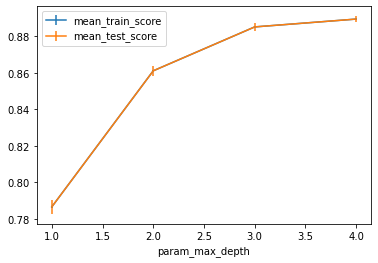

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 5)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [54]:
grid.best_params_
grid.score(X_test, y_test)

{'max_depth': 4}

0.8849718124951734

In [55]:
tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

0.8817283187890956

<Figure size 3000x900 with 0 Axes>

'no_pruning.png'

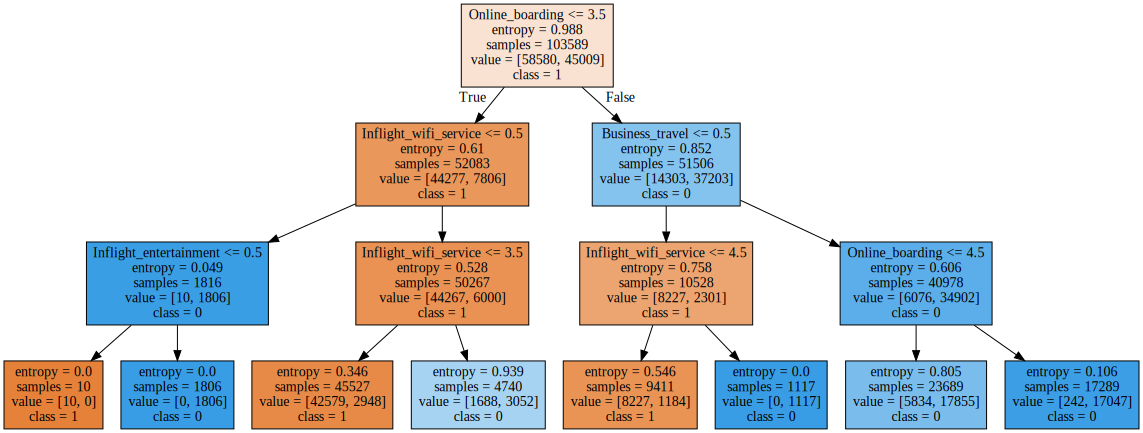

<Figure size 3000x900 with 0 Axes>

In [56]:
from sklearn.tree import plot_tree
import graphviz
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = export_graphviz(tree, out_file=None, feature_names=df_feature_names,class_names= df_target_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="no_pruning", cleanup=True)
graph

In [57]:
d = {'Feature_Name':df_feature_names,'Feature_Weights':tree.feature_importances_.tolist()}

In [58]:
important_features = pd.DataFrame(d)
important_features.sort_values(by='Feature_Weights',ascending=False).nlargest(5,columns='Feature_Weights')

,Feature_Name,Feature_Weights
10,Online_boarding,0.545214
5,Inflight_wifi_service,0.254949
3,Business_travel,0.198241
12,Inflight_entertainment,0.001596
14,Leg_room_service,0.000000


<div class="alert alert-block alert-info"> <u>Conclusion:</u> Based off our decision tree feature weights, we can observe the most important features as the online boarding experience, the inflight wifi service, whether a customer traveled business class or not, and the cleanliness of the airplane. 
    
<br>
<br>
<u>Recommendation:</u> Our recommendation is for the airline to take steps to try and improve the customer online boarding experience whether it be through improving the user interface or making the process more seamless. Other opportunities would be to improve the wifi performance or the cost of wifi on planes and maintain interesting inflight entertainment options. Without fully changing the customer cabin, the airline could observe features of business class that could be applied to economy such as premium snacks or better entertainment offerings.


### Loyalty


Loyalty was another distinguishing attributes between customers, hence we ran a logistic regression with the target variable as 'Loyalty' to understand what the effect of each component on the overall likelihood of whether a customer would be loyal or not. Prior to running the logistic regression, we balanced the dataset since there was a significantly greater proportion of loyal customers than disloyal customers. We also used GridSearchCV to tune the hyperparameters, C and penalty (L1/L2) to find the optimal model.

##### Balance the dataset

In [59]:
df.head()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus,cluster
0,0,1,52,1,160,5,4,3,4,3,...,2,5,5,50,44.0,1,0,1,0,2
1,0,1,36,1,2863,1,1,3,1,5,...,3,4,5,0,0.0,1,1,0,0,1
2,1,0,20,1,192,2,0,2,4,2,...,2,2,2,0,0.0,0,0,1,0,2
3,1,1,44,1,3377,0,0,0,2,3,...,3,1,4,0,6.0,1,1,0,0,1
4,0,1,49,1,1182,2,3,4,3,4,...,4,2,4,0,20.0,1,0,1,0,0


In [60]:
loyal_raw = df[df.Loyal_Customer == 1]
len(loyal_raw)

105773

In [61]:
disloyal_raw = df[df.Loyal_Customer == 0]
len(disloyal_raw)

23714

In [62]:
percentage = len(disloyal_raw)/float(len(loyal_raw))
percentage

0.22419710133966134

In [63]:
loyal = loyal_raw.sample(frac = percentage, random_state = 1)

In [64]:
len(loyal)
len(disloyal_raw)

23714

23714

In [65]:
df = disloyal_raw.append(loyal)

In [66]:
df.Loyal_Customer.value_counts()

0    23714
1    23714
Name: Loyal_Customer, dtype: int64

##### Logistic Regression on Target Variable 'Loyal_Customer'

In [67]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

%matplotlib inline

preprocessor = make_pipeline(StandardScaler(), SimpleImputer())

pipe_lr = Pipeline([('preprocessing', preprocessor),\
                    ('classifier', LogisticRegression(random_state = 0, multi_class = 'auto'))])

In [68]:
X = df.drop(['Loyal_Customer','cluster'],axis=1)
y = df.Loyal_Customer

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [70]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('simpleimputer', SimpleImputer())])),
  ('classifier', LogisticRegression(random_state=0))],
 'verbose': False,
 'preprocessing': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('simpleimputer', SimpleImputer())]),
 'classifier': LogisticRegression(random_state=0),
 'preprocessing__memory': None,
 'preprocessing__steps': [('standardscaler', StandardScaler()),
  ('simpleimputer', SimpleImputer())],
 'preprocessing__verbose': False,
 'preprocessing__standardscaler': StandardScaler(),
 'preprocessing__simpleimputer': SimpleImputer(),
 'preprocessing__standardscaler__copy': True,
 'preprocessing__standardscaler__with_mean': True,
 'preprocessing__standardscaler__with_std': True,
 'preprocessing__simpleimputer__add_indicator': False,
 'preprocessing__simpleimputer__copy': True,
 'preprocessing__simpleimputer__fill_value': None,
 'preprocessing__s

In [71]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        random_state=0, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

grid.best_params_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1.0, 10],
                         'logisticregression__penalty': ['l2', 'l1']},
             return_train_score=True)

{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}

In [72]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.738711,0.069197,0.025482,0.000694,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.892789,0.885902,0.887088,0.888593,0.003007,3,0.887365,0.889899,0.889464,0.888909,0.001107
1,0.095644,0.034420,0.000000,0.000000,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
2,1.375295,0.182435,0.024546,0.000474,1.0,l2,"{'logisticregression__C': 1.0, 'logisticregres...",0.893580,0.886851,0.887879,0.889436,0.002960,1,0.887088,0.891046,0.890176,0.889436,0.001698
3,0.099999,0.005169,0.000000,0.000000,1.0,l1,"{'logisticregression__C': 1.0, 'logisticregres...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
4,2.259744,0.247446,0.012441,0.006565,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.893106,0.886613,0.887799,0.889173,0.002823,2,0.887523,0.890888,0.890295,0.889568,0.001467
5,0.170745,0.145191,0.000000,0.000000,10,l1,"{'logisticregression__C': 10, 'logisticregress...",NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN


In [73]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_logisticregression__C', columns='param_logisticregression__penalty')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))
res

param_logisticregression__penalty,l2
0.1,0.889
1.0,0.889
10.0,0.889


In [74]:
accuracy = grid.score(X_test, y_test)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Best cross-validation score: 0.889
Accuracy score of the GridSearchCV is 0.890


In [75]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, random_state=0))])


In [76]:
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[ 0.16543561  5.67154531 -6.78364155  5.64772686 -2.61294113  1.12052147
  -0.46980395  0.36522282 -0.85982104  2.54133555  0.69261833  2.2852932
  -0.50395552  0.1454919  -1.21631536 -0.94636826 -1.17705276 -1.7737402
  -0.53972777  0.76492333  2.11724484 -0.02148115 -0.81641129  0.74670215]]


In [77]:
print("Logistic regression feature names:\n{}".format(
      X.columns.tolist()))

Logistic regression feature names:
['Male', 'Age', 'Business_travel', 'Flight_Distance', 'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Satisfied', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


In [78]:
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Test set score: 0.89


<div class="alert alert-block alert-info"> <u>Conclusion:</u><br>
A few examples of interpreting our logistic regression coefficients are as such:<br> 

-If a customer is traveling in Economy Plus, the odds that the customer is Loyal is .746 times more likely than the odds that the customer is not Loyal when all other variables are held constant.<br>
    
-If a customer is Satisfied, the odds that the customer is Loyal is 2.11 times more likely than the odds that the customer is not Loyal when all other variables are held constant.<br>

-If the departure/arrival time is convenient, the odds that the customer is Loyal is 1.12 times more likely than the odds that the customer is not Loyal when all other variables are held constant.<br>

    
<br>
<br>
<u>Recommendation:</u> Our recommendation is for the airline to take steps to try and improve the overall customer satisfaction to help them convert as loyal customers. Also, improving sales on Economy Plus tickets or optimizing flight times for customer convenience (such as aligning to hotel check-in times, etc.) may also help improve customer loyalty.


### Best ML Model to Predict Target Variable 'Satisfaction'

Random Forest - 0.9932<br>
*best params:(max_depth=12, max_features=12, n_estimators=500)<br>*

Gradient Boost Classifier - 0.9928<br>
*best params: 'learning_rate': 0.1, 'n_estimators': 500<br>*

XGBoost - 0.9947<br>
LightGBM - 0.9946<br>
CatBoost - 0.9952<br>
<br>
Best Model: CatBoost

### Best ML Model to Predict Target Variable 'Loyalty'

Random Forest - .9931 <br>
*best params:(max_depth=12, max_features=8, n_estimators=500)<br>*

Gradient Boost Classifier - .9961 <br>
*best params:('learning_rate': 0.1, 'n_estimators': 500)<br>*

XGBoost - 0.9973 <br>
LightGBM - 0.9967<br>
CatBoost - 0.9974 <br>
<br>
Best Model: CatBoost

Why Ensemble Methods?<br>
Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model. *(towardsdatascience.com)* The use of ensemble methods are very widely used and are very accurate in many applications. Our application is not related to text classification so these models are good candidates for prediction. One drawback is that they are difficult for humans to read but the models are easy to use and are some of the most accurate models. GridSearchCV was used to create and tune various models but the ensemble methods proved to be the most accurate.